In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from mlp import MLP
import seaborn as sns

In [3]:
dataset = load_digits()
X = dataset.data / 255.0
Y = np.eye(10)[dataset.target]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
mlp = MLP(input_size=X_train.shape[1], layer_1=128, layer_2=32, output_size=Y_train.shape[1], learning_rate=0.1)
mlp.fit(X_train, Y_train, epochs=100)

Epoch 1/100 - Loss: 0.354977, Accuracy: 0.10
Epoch 2/100 - Loss: 0.323614, Accuracy: 0.11
Epoch 3/100 - Loss: 0.286591, Accuracy: 0.30
Epoch 4/100 - Loss: 0.247766, Accuracy: 0.52
Epoch 5/100 - Loss: 0.217769, Accuracy: 0.65
Epoch 6/100 - Loss: 0.197276, Accuracy: 0.72
Epoch 7/100 - Loss: 0.179294, Accuracy: 0.78
Epoch 8/100 - Loss: 0.168460, Accuracy: 0.81
Epoch 9/100 - Loss: 0.159626, Accuracy: 0.83
Epoch 10/100 - Loss: 0.152954, Accuracy: 0.84
Epoch 11/100 - Loss: 0.146820, Accuracy: 0.85
Epoch 12/100 - Loss: 0.142817, Accuracy: 0.86
Epoch 13/100 - Loss: 0.137898, Accuracy: 0.87
Epoch 14/100 - Loss: 0.132332, Accuracy: 0.88
Epoch 15/100 - Loss: 0.123498, Accuracy: 0.90
Epoch 16/100 - Loss: 0.128745, Accuracy: 0.89
Epoch 17/100 - Loss: 0.125251, Accuracy: 0.89
Epoch 18/100 - Loss: 0.122783, Accuracy: 0.89
Epoch 19/100 - Loss: 0.117153, Accuracy: 0.90
Epoch 20/100 - Loss: 0.114826, Accuracy: 0.91
Epoch 21/100 - Loss: 0.111948, Accuracy: 0.92
Epoch 22/100 - Loss: 0.109299, Accuracy: 0.

In [6]:
loss_train, accuracy_train = mlp.evaluate(X_train, Y_train)
loss_test, accuracy_test = mlp.evaluate(X_test, Y_test)

print(f"Loss Train: {loss_train:.6f}, Accuracy Train: {accuracy_train:.2f}")
print(f"Loss Test: {loss_test:.6f}, Accuracy Test: {accuracy_test:.2f}")


Loss Train: 0.017847, Accuracy Train: 1.00
Loss Test: 0.054060, Accuracy Test: 0.98


In [7]:
Y_pred_test = mlp.predict(X_test).reshape(-1, 10)
Y_pred_classes = np.argmax(Y_pred_test, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

conf_matrix = confusion_matrix(Y_test_classes, Y_pred_classes)


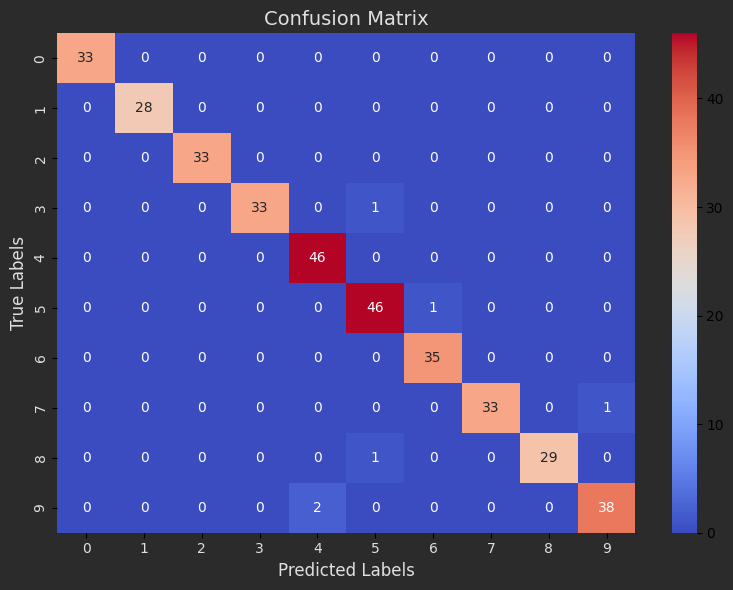

In [8]:
plt.figure(figsize=(8, 6))
fig = plt.gcf()  
fig.patch.set_facecolor('#2b2b2b')  

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title("Confusion Matrix", fontsize=14, color='#e0e0e0')
plt.xlabel("Predicted Labels", fontsize=12, color='#e0e0e0')
plt.ylabel("True Labels", fontsize=12, color='#e0e0e0')
plt.xticks(color='#e0e0e0')
plt.yticks(color='#e0e0e0')

plt.tight_layout()
plt.show()


In [13]:
import cv2

image = cv2.imread('6.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.reshape(1, -1)
x = image

Y_pred = mlp.predict(x)
print(Y_pred)
print(np.argmax(Y_pred))

[[[1.52952165e-12 6.05264815e-06 1.58938172e-08 7.14600619e-09
   4.68594526e-09 4.74853502e-05 9.99945074e-01 6.63260589e-17
   1.36016989e-06 1.08018532e-12]]]
6
